In [16]:
#Main Project Stage 1: Data Science and Machine Learning
# Import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

# Set sns theme to your preferred color palette
sns.set_theme(palette = "mako")

data = pd.read_csv('data/data-input.csv')  # read csv file
data.to_csv("data/data.csv",index=False)
#data input is the data that I had previously cleaned before starting the assignment
data = pd.read_csv("data/data.csv") #pretty confused as to why the instructions ask for this, but I guess its not a big deal
data['median_income']=pd.cut(data['median_income'],bins=[0, 1.5, 2.5, 4, 6, 8, 10, 1000], 
include_lowest=True, 
labels=['poverty','below average','average','above average','well off','wealthy','rich'])
df = data.copy()  # create a copy to use for future reference, so I have a copy of my original dataset when needed

data.head()
#Cleaned data (now called data-input.csv) by hand beforehand before reading instructions, so my data is already good.
#Will be skipping the pandas clean data step



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,wealthy,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,wealthy,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,well off,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,above average,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,average,342200.0,NEAR BAY


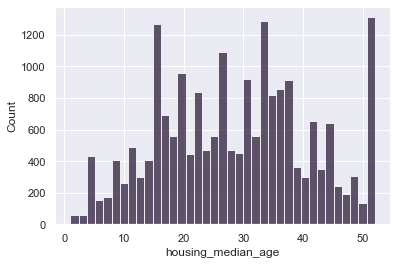

In [17]:
#Histogram showing distribution of housing age in the market
agehist = sns.histplot(data=df, x = "housing_median_age")
fig = agehist.get_figure()
fig.savefig("plots/plot1.png") 

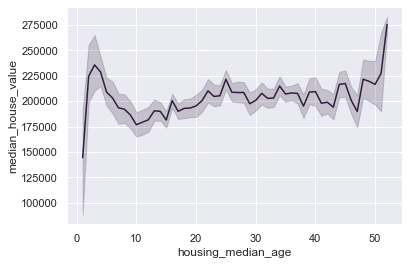

In [18]:
#Visualization of relationship (and variation) in housing price based on its age
age_value_lineplot = sns.lineplot(data=df, x = "housing_median_age", y = "median_house_value")
fig = age_value_lineplot.get_figure()
fig.savefig("plots/plot2.png") 

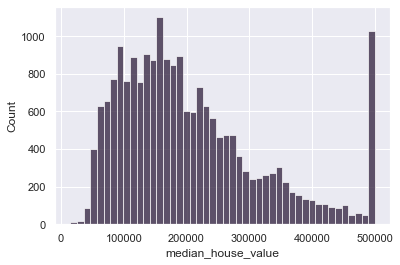

In [19]:
#Visualization of price distribution of houses in california
house_value_histplot = sns.histplot(data=df, x = "median_house_value")
fig = house_value_histplot.get_figure()
fig.savefig("plots/plot3.png") 
#Can see from output that a majority of the houses are from 150k to 250k

Where the data came from.:

https://www.kaggle.com/datasets/kathuman/housing
I will be using the dataset on Housing Prices in California found on Kaggle with a creative Commons Public Domain License
Description of data from creator: 
"This dataset is based on data from the 1990 California Census, and incluides metrics such as the population, median income, and median housing proice for each block group in California.
Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data., and each block typically has between 600 to 3000 people."

The goal I have with this dataset is to be able to get my model to guess the price of houses given all the other information.


Challenges cleaning:

One of the challenges I had cleaning was that the dataset was humongous (22k rows) so I worried that I missed some stuff while cleaning but overall it was pretty straightforward. I cleaned it by hand before starting the assignment, and the biggest issue was that there was a lot of data to delete by hand. There was a lot of cells that just had nothing inside it, so I had to delete the entire line, which meant I couldnt automate it with find and replace. But other than that, the data seems pretty clean, and there are some spots in the data that I might need to go back and change, but for now I think the data looks reliable, based on the distribution I've seen from my graphs. 

Three visualizations:

plot1 is a distribution of the age of the house. We can see that california has a wide range of ages for their houses. But their seems to be a spike in houses that are around 20, 30, and 50+ years old. Overall I think the distribution in that column is pretty good, and should pose no issues in training my model.

plot2 is a visualization of relationship (and variation) in housing price based on its age. One thing that bothered me in this, is that from the graph, the house prices seem to very a lot for some age groups, specifically ~10 years old and ~50 years old. I worry that this will have negative effects in the model, but at the same time, logically speaking this is a realistic scenario. As old houses that are still standing are likely to be very nice to begin with, and new houses that are being built are being built for many different types of people with different incomes, especially in california where there is a large amount of wealthy and average people concentrated in one area.

plot3 is a visualization of price distribution of houses in california. I wanted to see where the price of houses was concentrated, this graph allowed me to see that a majority of the houses in california in the dataset are around $150k-250k. But there is also a sizeable amount of houses below and above that number. Which should pose as good variation to give model a wide range of information to make accurate estimates. 

Part 2 code begins after this report
--

In [20]:
df.shape  # Will return the number of rows and columns

(20433, 10)

In [21]:
df.info()  # Will inform you of the datatype of each variable, as well as if there are any null or missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20433 non-null  float64 
 1   latitude            20433 non-null  float64 
 2   housing_median_age  20433 non-null  float64 
 3   total_rooms         20433 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20433 non-null  float64 
 6   households          20433 non-null  float64 
 7   median_income       20433 non-null  category
 8   median_house_value  20433 non-null  float64 
 9   ocean_proximity     20433 non-null  object  
dtypes: category(1), float64(8), object(1)
memory usage: 1.4+ MB


In [22]:
df.describe().T # Describe the data-frame (transposed) - defaults to describing only numerical
# If you want to describe all, run the following command:
# data.describe(include = "all").T


,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,20433.0,35.633221,2.136348,32.54,33.93,34.26,37.72,41.95
housing_median_age,20433.0,28.633094,12.591805,1.00,18.00,29.00,37.00,52.00
total_rooms,20433.0,2636.504233,2185.269567,2.00,1450.00,2127.00,3143.00,39320.00
total_bedrooms,20433.0,537.870553,421.385070,1.00,296.00,435.00,647.00,6445.00
population,20433.0,1424.946949,1133.208490,3.00,787.00,1166.00,1722.00,35682.00
households,20433.0,499.433465,382.299226,1.00,280.00,409.00,604.00,6082.00
median_house_value,20433.0,206864.413155,115435.667099,14999.00,119500.00,179700.00,264700.00,500001.00


In [23]:
df.isnull().sum()  # Checking for null values
# In this case there are no null values. If there are some, you can use a heatmap to visualize them if you want.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [27]:
#Organizing categorical data
#Citation is from Joweria's heartdisease tutorial notebook
from pandas.core.arrays import categorical 
#my df is joweria data, my df is joweria data
categorical_data = ["ocean_proximity","median_income"]

codes = {}  # Create a dictionary to store the codes of the conversion
for i in df:  # For each variable in the data frame 
  if i in categorical_data:  # For each variable that was classified as categorical
    specific_codes = {}  # Create a dictionary for that variable's code conversion 
    df[i] = df[i].astype("category")  # Convert that variable from 'object' datatype to category
    df[i] = df[i].cat.codes  # Create codes for the categories and replace in the dataset 
    coded = df[i].unique()  # Get the unique values (the codes) from the variable
    count = 0  # Count initialized. Later used for accessing specific indexes
    for j in data[i].unique():  # For each unique value
      specific_codes[j] = coded[count]  # Create an item in the dictionary with the value, and tell it which code correlates
      count += 1  # Count incremented
    codes[i] = specific_codes  # Create a new item in the overall dictionary with the dictionary created for this specific variable's codes


# View our created dictionary:
for i in codes:
  print("{} -".format(i))
  for j in codes[i]:
    print("{}: {}".format(j, codes[i][j]))
  print()

median_income -
wealthy: 5
well off: 4
above average: 3
average: 2
below average: 1
poverty: 0
rich: 6

ocean_proximity -
NEAR BAY: 3
<1H OCEAN: 0
INLAND: 1
NEAR OCEAN: 4
ISLAND: 2



In [28]:
df.head()
#Checking that data is no longer categorical and now an integer at the end

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,5,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,5,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,4,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,3,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,2,342200.0,3


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
fs_data = df.copy() # copy of dataset for feature selection
x = fs_data.iloc[:,[0,1,2,3,4,5,6,7,8]]  # independent variables
y = fs_data.iloc[:,[9]]    # target column / what we're trying to predict


#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#Found this easy way to split training data in the scikit documentation
#Shuffles data, and allocated 80% of it to be used for training, and 20% of it to be used for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) # splitting up dataset to training and testing

scl = RobustScaler() # Preprocess numerical data 
x_train = scl.fit_transform(x_train) 
x_test = scl.transform(x_test)

In [ ]:
#x_train.head()

In [30]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_train)
print(normalizer.mean.numpy())

[[-0.28286847  0.36352098 -0.02113185  0.30338335  0.29487276  0.27455467
   0.27898753  0.28349462  0.18710104]]


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten


print("--Make model--")
model = tf.keras.models.Sequential([
  normalizer,
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("--Fit model--")
model.fit(x_train, y_train, epochs=200, verbose=2)

--Make model--
--Fit model--
Epoch 1/200
511/511 - 1s - loss: 0.6822 - accuracy: 0.7375 - 724ms/epoch - 1ms/step
Epoch 2/200
511/511 - 0s - loss: 0.3757 - accuracy: 0.8480 - 439ms/epoch - 858us/step
Epoch 3/200
511/511 - 0s - loss: 0.3293 - accuracy: 0.8638 - 434ms/epoch - 849us/step
Epoch 4/200
511/511 - 0s - loss: 0.2910 - accuracy: 0.8791 - 444ms/epoch - 869us/step
Epoch 5/200
511/511 - 0s - loss: 0.2672 - accuracy: 0.8896 - 439ms/epoch - 858us/step
Epoch 6/200
511/511 - 0s - loss: 0.2482 - accuracy: 0.8976 - 434ms/epoch - 849us/step
Epoch 7/200
511/511 - 0s - loss: 0.2307 - accuracy: 0.9042 - 442ms/epoch - 865us/step
Epoch 8/200
511/511 - 0s - loss: 0.2168 - accuracy: 0.9099 - 442ms/epoch - 866us/step
Epoch 9/200
511/511 - 0s - loss: 0.2071 - accuracy: 0.9125 - 441ms/epoch - 864us/step
Epoch 10/200
511/511 - 0s - loss: 0.2033 - accuracy: 0.9159 - 446ms/epoch - 874us/step
Epoch 11/200
511/511 - 0s - loss: 0.1902 - accuracy: 0.9209 - 446ms/epoch - 874us/step
Epoch 12/200
511/511 - 0s

In [ ]:
#Saving model
model.save("main2classif", save_format='h5')

In [ ]:
print("--Evaluate model--")
model_loss1, model_acc1 = model.evaluate(x_train,  y_train, verbose=2)
model_loss2, model_acc2 = model.evaluate(x_test,  y_test, verbose=2)
print(f"Train / Test Accuracy: {model_acc1*100:.1f}% / {model_acc2*100:.1f}%")


--Evaluate model--
511/511 - 0s - loss: 0.0388 - accuracy: 0.9850 - 398ms/epoch - 779us/step
128/128 - 0s - loss: 0.1961 - accuracy: 0.9513 - 86ms/epoch - 671us/step
Train / Test Accuracy: 98.5% / 95.1%


Did more data cleaning to convert income to a categorical value at the top of the code.

In [ ]:
# scatplot = sns.scatterplot(data=df, x = "median_income", y ="median_house_value")
# fig = scatplot.get_figure()

